# Module 1 Final Project - Part 1


## Introduction

This project is divided in different stages and follows the **OSEMN process** : Obtain, Scrub, Explore, Model and Interpret. 


## The Process

### 1. Obtain

Our Customer: Home Sellers wanting to estimate the Sale value of their property based on the available data from the King County Sales dataset (provided in csv format. File `"kc_house_data.csv"`).

Our Requirement: Provide meaningful information to potential client so that the model can be a predictor of the parameters of interest.

I target the analysis to those areas where the potential client have an opportunity to take action and may be able to increase the sales price of their property.  Some features in our date, even when are very meaningful for the estimation of the price, may not be able to be modified  and just provide a point of reference or bechmark of what the price may be.


#### loading the data and identify the information that needs to be processed
First we load and analyze the dataset

In [1]:
#importing the libraries we will use and reading dataset 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')

After loading our dataset we want to know how big the dataset is, how many columns, the type and names of the columns and also a sample of the data

In [2]:
#displaying the dataset information and the header
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB
None


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#obtaining the stats for the numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


The column ID represents the unique identifier for a House. Let's review the number of unique values for the column ID.

In [4]:
#unique values for column ID
print(f'{len(df.id.unique())} unique ID numbers')
print(f'{(df.id.value_counts()>1).sum()} ID with multiple rows')

21420 unique ID numbers
176 ID with multiple rows


This indicates that we have only 176 houses that have more than one record. The "duplicate" rows may be valid, I will decide how to handle them after some further analysis - if necessary. 

### Findings

We'll check each further before deciding how to handle the data.
* **a) Incorrect data type:**
    - date is encoded as string. Depending how we will use this column, date type may be better if we would like to do any calculation based on dates.
    - sqft_basement is encoded as string whereas a numeric type would be expected.
    - yr_renovated is float64, int64 would be better representation of the year
* **b) Missing values:** waterfront, view and yr_renovated have missing values 
* **c) Outliers:** bedrooms has one max of 33 (rooms) which is unusual, sqft_lot and sqft_lot15 also seem to have very high max values, yr_renovated has a high concentration of a low value.
* **d) Identify categorical data:** several columns seem to have few values and could be converted as categories. ie: bedrooms, bathroom, condition, floors, grade, view, waterfront, zipcode. Others such as yr_built and yr_renovated could be binned to create ranges of years (instead of dealing with individual years)

### 2. Scrub
During this step we will preprocess the data. The identification and handling of incorrect data types, missing values (complete, remove, replace), deal with outliers, normalizing the data and select the features for the analysis. 


#### Pre-processing our data 

**a) Incorrect data type** 

Columns **date** and **sqft_basement** are encoded as string. We would expect to have datetime and float64 respectively for these. Let's look in detail at each and convert to the most appropriate.

**date**

In [5]:
#looking inside date, to verify that information would be expected in date format
df.date.unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

Seems the majority of values are formatted in yyyy-mm-dd so I decided to convert the column to a datetime using pandas to_datetime.

In [6]:
# converting column date to datetime
df.date = pd.to_datetime(df.date)

In [7]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
df.date.head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

**sqft_basement**

In [8]:
#looking inside date, to verify that information would be expected in date format
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
550.0        76
780.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
516.0         1
3000.0        1
508.0         1
1284.0        1
3500.0        1
2240.0        1
861.0         1
2580.0        1
2850.0        1
475.0         1
1245.0        1
4130.0        1
2250.0        1
1960.0        1
666.0         1
4820.0        1
2400.0        1
2130.0        1
1990.0        1
935.0         1
652.0         1
2390.0        1
506.0         1
243.0         1
374.0         1
3480.0        1
225.0         1
704.0         1
143.0         1
2810.0        1
Name: sqft_basement, Len

Most values seem to be numbers stored as string, but we notice that a good number of rows have the "?" character and also quite a few records have 0 sqft.  We can make some considerations about the meaning of each, for instance that the "?" represents there may be a value however it was not captured or loaded correctly in the source file. Same for the Zero values: it could mean that they were identified as Zero because the house has no basement or because it is not indicated in the original source data.  The only way to know for sure would be if the data came with the assumptions or interpretaions of the values.

Since we do not have that description, I decided that makes sense replace the "?" values by Zero and then change the data type from string to float64

In [9]:
#We replace the ? for 0
df.sqft_basement.replace('?','0', inplace = True)

In [10]:
# changing the data type to float64
df.sqft_basement = df.sqft_basement.astype(np.float64, inplace = True)

In [11]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


**b) Missing values**

Let's review one by one the columns in the Dataset that contain NULL values

In [12]:
# display % of NULL for columns with missing values, the unique values and their counts
for col in df.columns:
    if df[col].isna().sum()!=0:
        print(f'{col}\nmissing (count): {df[col].isna().sum()}')
        print(f'missing(%): {round((df[col].isna().sum()/len(df))*100,2)}')
        print(f'unique:{df[col].unique()}\nvalue counts\n{df[col].value_counts().head(10)}\n')

waterfront
missing (count): 2376
missing(%): 11.0
unique:[nan  0.  1.]
value counts
0.0    19075
1.0      146
Name: waterfront, dtype: int64

view
missing (count): 63
missing(%): 0.29
unique:[ 0. nan  3.  4.  2.  1.]
value counts
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

yr_renovated
missing (count): 3842
missing(%): 17.79
unique:[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]
value counts
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
Name: yr_reno

**b) Missing values**

Let's review one by one the columns in the Dataset that contain NULL values

**waterfront** has a high number (2376, 11%) of NULLs and only has two values (in addition to NULL). Being a categorical I decided to keep the rows replacing all the NULLs with Zero.

In [13]:
#We replace the NULL for Zero
df.waterfront.fillna(0, inplace = True)

The next column with NULL is **view** . There are only 63 rows (0.29%) with missing values, and only a few available values -> Categorical. I decided to replace the missing values with Zero

In [14]:
#We replace the NULL for the placeholder value "Not specified""
df.view.fillna(0, inplace = True)

    
The last column with NULLs is **yr_renovated** . From the value counts we see a large number of Zeros.

There's no information (no data dictionary) on what the Zero value represents i.e.: missing information, the house has not been renovated, etc. NULLs represent a significant part of our data (17.79%) so I decide to keep the records and assign Zero where there's missing values.

In [15]:
#We replace the NULL values for Zero
df.yr_renovated.fillna(0, inplace = True)

We confirm that NULL values have been taking care of.

In [16]:
#confirming values replaced
for col in ['waterfront', 'view','yr_renovated']:
            print(f'{col} null: {df[col].isna().sum()}')

waterfront null: 0
view null: 0
yr_renovated null: 0


**yr_renovated** is float64 and **yr_built** is int64. I would expect to change these in to datetime however when I tested the pandas conversion was not respecting the format '%Y-%m-%d' and I decided to leave them for now and decide later if the typechange is really necessary for the analysis.



**c) Handling outliers**

Displaying our columns looking for evident outliers

In [ ]:
df.describe()

price, bedrooms, bathrooms, sqft_lot and sqft_lot15 seem to have very high max values. Having boxplots for these would help us visualy. 

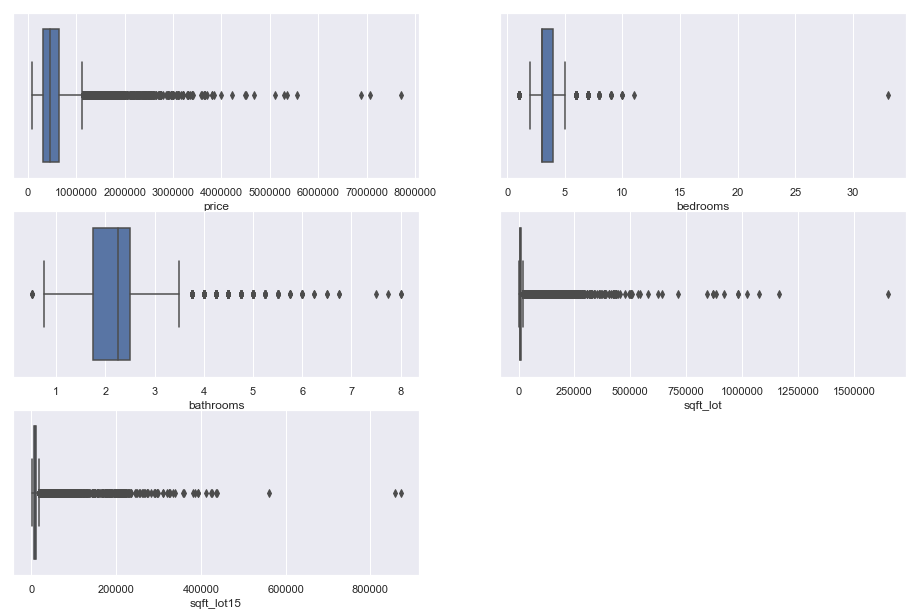

In [17]:
plt.figure(figsize = (16,14))
plt.subplot(421)
sns.boxplot(x='price', data = df)
plt.subplot(422)
sns.boxplot(x='bedrooms', data = df)
plt.subplot(423)
sns.boxplot(x='bathrooms', data = df)
plt.subplot(424)
sns.boxplot(x='sqft_lot', data = df)
plt.subplot(425)
sns.boxplot(x='sqft_lot15', data = df)

****bedrooms****

33 bedrooms seem extreme, counting number of records where the quantile is above 0.999 and will be discarding those as they may affect significantly our mean

In [18]:
df.loc[df.bedrooms>df.bedrooms.quantile(.999)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4092,1997200215,2014-05-07,599999.0,9,4.50,3830,6988,2.5,0.0,0.0,...,7,2450,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291
4231,2902200015,2015-01-06,700000.0,9,3.00,3680,4400,2.0,0.0,0.0,...,7,2830,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450
6073,9822700190,2014-08-08,1280000.0,9,4.50,3650,5000,2.0,0.0,0.0,...,8,2530,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000
8537,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0.0,0.0,...,7,4050,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866
8748,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0.0,0.0,...,7,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700
16830,8823900290,2015-03-17,1400000.0,9,4.00,4620,5508,2.5,0.0,0.0,...,11,3870,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320
18428,8823901445,2015-03-13,934000.0,9,3.00,2820,4480,2.0,0.0,0.0,...,7,1880,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400


In [19]:
#identifying the index for the rows and droping them
to_drop= list(df.loc[df.bedrooms>df.bedrooms.quantile(.999)].index)
df.drop(to_drop, inplace = True)
df.bedrooms.mean()

3.368989159640508

****bathrooms****

applying same logic, removing records that are above aour .999 quantile

In [20]:
df.loc[df.bathrooms>df.bathrooms.quantile(.999)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1313,7558700030,2015-04-13,5300000.0,6,6.00,7390,24829,2.0,1.0,0.0,...,12,5000,2390.0,1991,0.0,98040,47.5631,-122.210,4320,24619
4020,9175600025,2014-10-07,800000.0,7,6.75,7480,41664,2.0,0.0,2.0,...,11,5080,2400.0,1953,0.0,98166,47.4643,-122.368,2810,33190
4031,685000115,2014-10-07,2150000.0,8,6.00,4340,9415,2.0,0.0,0.0,...,8,4340,0.0,1967,0.0,98004,47.6316,-122.202,2050,9100
4407,2470100110,2014-08-04,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,0.0,98039,47.6289,-122.233,3560,24345
6495,2626069030,2015-02-09,1940000.0,4,5.75,7220,223462,2.0,0.0,4.0,...,12,6220,1000.0,2000,0.0,98053,47.7097,-122.013,2680,7593
7245,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
8085,1924059029,2014-06-17,4670000.0,5,6.75,9640,13068,1.0,1.0,4.0,...,12,4820,4820.0,1983,2009.0,98040,47.5570,-122.210,3270,10454
9245,9208900037,2014-09-19,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
12358,6065300370,2015-05-06,4210000.0,5,6.00,7440,21540,2.0,0.0,0.0,...,12,5550,1890.0,2003,0.0,98006,47.5692,-122.189,4740,19329
12764,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0.0,4.0,...,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


In [21]:
#identifying the index for the rows and droping them
to_drop= list(df.loc[df.bathrooms>df.bathrooms.quantile(.999)].index)
df.drop(to_drop, inplace = True)
df.bathrooms.mean()

2.111199981453146

****price****

the max value of 7.7M is way out of the mean. Let's see how many records are above the 0.999 quantile in price

In [22]:
#count records above 0.999 quantile
df.loc[df.price>df.price.quantile(0.999)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1162,1247600105,2014-10-20,5110000.0,5,5.25,8010,45517,2.0,1.0,4.0,...,12,5990,2020.0,1999,0.0,98033,47.6767,-122.211,3430,26788
1446,8907500070,2015-04-13,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750
2083,8106100105,2014-11-14,3850000.0,4,4.25,5770,21300,2.0,1.0,4.0,...,11,5770,0.0,1980,0.0,98040,47.5850,-122.222,4620,22748
2624,7738500731,2014-08-15,4500000.0,5,5.50,6640,40014,2.0,1.0,4.0,...,12,6350,290.0,2004,0.0,98155,47.7493,-122.280,3030,23408
2862,4114601570,2014-11-18,3600000.0,3,3.25,5020,12431,2.0,1.0,4.0,...,10,3420,1600.0,1941,2002.0,98144,47.5925,-122.287,3680,12620
3910,9808700762,2014-06-11,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
4145,6447300265,2014-10-14,4000000.0,4,5.50,7080,16573,2.0,0.0,0.0,...,12,5760,1320.0,2008,0.0,98039,47.6151,-122.224,3140,15996
5874,2525049148,2014-10-07,3420000.0,5,5.00,5450,20412,2.0,0.0,0.0,...,11,5450,0.0,2014,0.0,98039,47.6209,-122.237,3160,17825
6502,4217402115,2015-04-21,3650000.0,6,4.75,5480,19401,1.5,1.0,4.0,...,11,3910,1570.0,1936,0.0,98105,47.6515,-122.277,3510,15810
7028,853200010,2014-07-01,3800000.0,5,5.50,7050,42840,1.0,0.0,2.0,...,13,4320,2730.0,1978,0.0,98004,47.6229,-122.220,5070,20570


In [23]:
#identifying the index for the rows and droping them
to_drop= list(df.loc[df.price>df.price.quantile(.999)].index)
df.drop(to_drop, inplace = True)
df.price.mean()

534619.2555344132

In [24]:
# reviewing the columns again
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.154700e+04,2.154700e+04,21547.000000,21547.000000,21547.000000,2.154700e+04,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000,21547.000000
mean,4.579907e+09,5.346193e+05,3.366037,2.109145,2070.853994,1.503620e+04,1.493108,0.006219,0.229684,3.410220,7.650995,1781.670581,283.161043,1970.987469,68.175106,98077.985891,47.559939,-122.213970,1983.695224,12722.609783
std,2.875963e+09,3.368714e+05,0.891445,0.753796,890.592964,4.130939e+04,0.539588,0.078617,0.757165,0.650781,1.161783,811.065286,433.891230,29.361769,362.541113,53.509802,0.138641,0.140782,681.676140,27208.608799
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.210000e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470450,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.609000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571600,-122.231000,1840.000000,7620.000000
75%,7.308600e+09,6.410000e+05,4.000000,2.500000,2540.000000,1.064700e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,540.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10075.000000
max,9.900000e+09,3.300000e+06,8.000000,5.500000,7880.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


****sqft_living, sqft_lot****

Repeating the process for sqft_living and sqft_lot, we see how many records are above the 0.9999 quantile

In [25]:
#identifying the index for the rows and droping them
to_drop= list(df.loc[df.sqft_living>df.sqft_living.quantile(.999)].index)
df.drop(to_drop, inplace = True)
df.sqft_living.mean()

2065.7601858304297

In [26]:
#identifying the index for the rows and droping them
to_drop= list(df.loc[df.sqft_lot>df.sqft_lot.quantile(.999)].index)
df.drop(to_drop, inplace = True)
df.sqft_lot.mean()

14173.89108496489

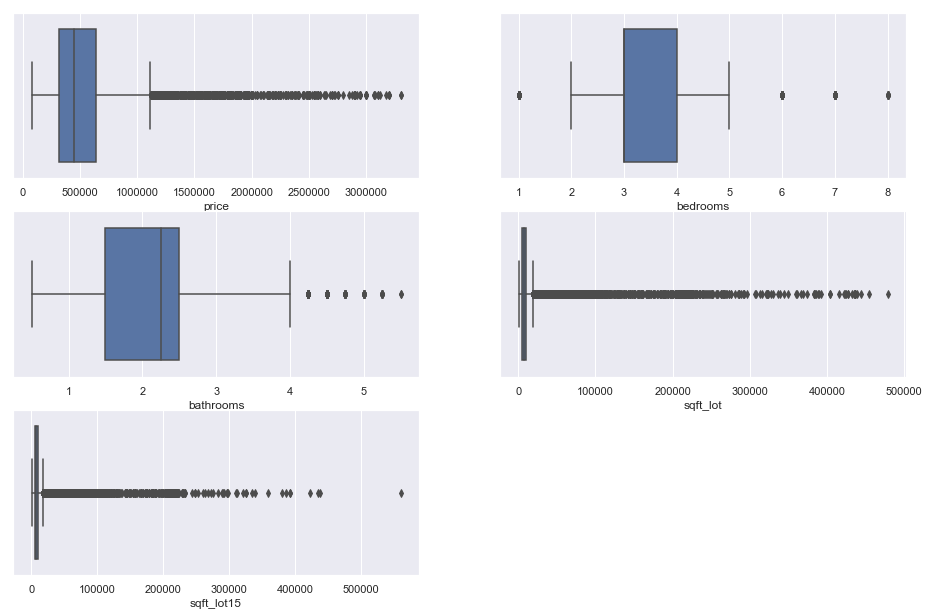

In [27]:
plt.figure(figsize = (16,14))
plt.subplot(421)
sns.boxplot(x='price', data = df)
plt.subplot(422)
sns.boxplot(x='bedrooms', data = df)
plt.subplot(423)
sns.boxplot(x='bathrooms', data = df)
plt.subplot(424)
sns.boxplot(x='sqft_lot', data = df)
plt.subplot(425)
sns.boxplot(x='sqft_lot15', data = df)

After eliminating the outrageous outliers then we proceed with our Exploration.

### Checkpoint###

I will save my pre-processed dataset with a different name so that I can continue working with the cleaned data in the next phases

In [28]:
#saving the dataset in a file, without creating a new index
df.to_csv('cln_kc_house_data.csv',index=False)

### 3. Explore

Getting to know the Data Set, we would like to understand how the price is affected by certain variables. 

As a home seller, some information is used as "input" such the physical location of a house as provides insight of the comparables in the area. This is not a factor that can be modified.

However, there may be some other factors that may benefit the seller to increase their return:  such as when is best to sell, if renovations play a role on price, the increase in living sq footage.


In the following steps I'll normalize the columns that require it, find correlation amongst features and also select the features that will be used for my analysis. 

#### Identify Distributions ####

Plotting the distribution for the numerical data columns to test for normality

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


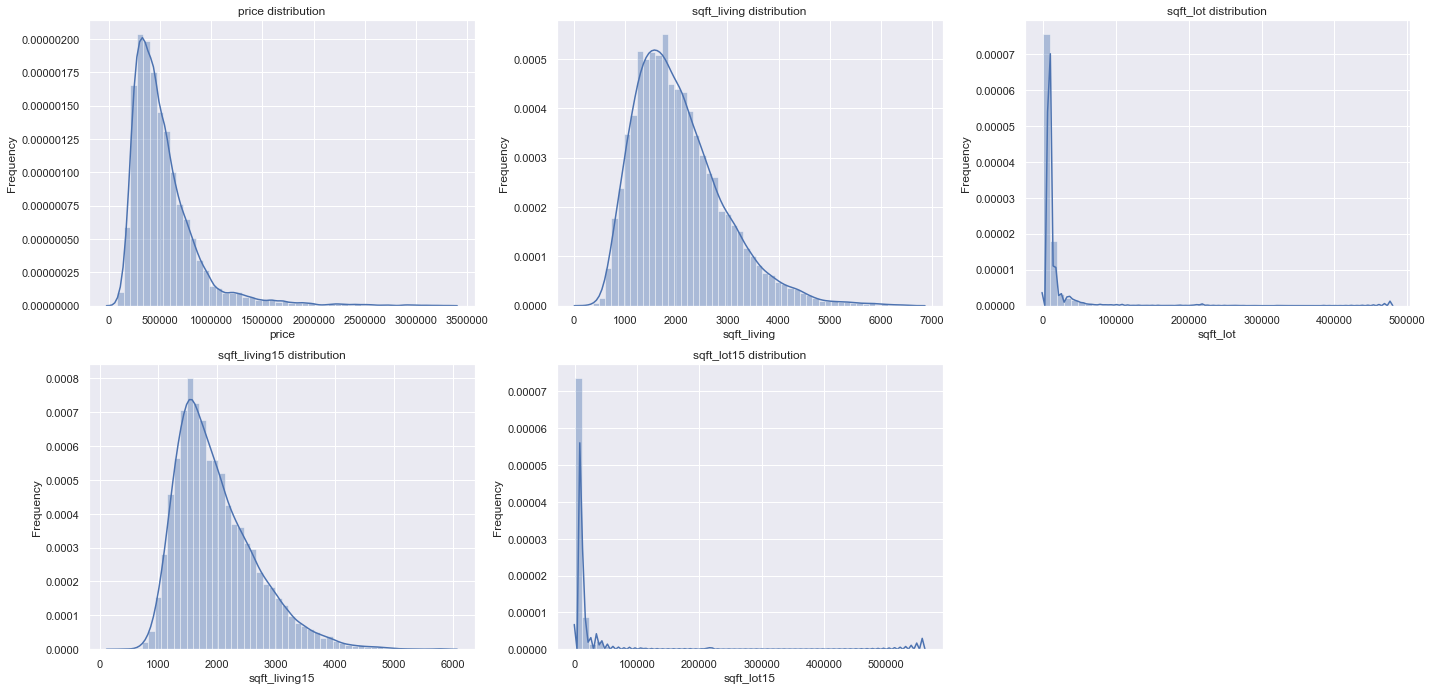

In [89]:
#plotting the columns with continuous values
plt.figure(figsize = (20,14))
i = 331
for col in ['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']:
    plt.subplot(i)
    plt.tight_layout()
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} distribution')
    i+=1

all 5 of our features show positive skeweness, even after we removed all the outliers greater than .999 quantile. To help with the normalization we will apply a logaritmic transformation

In [90]:
# creating a copy of the dataframe and apply normalization
df_log = df.copy()
#for col in ['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']: - removing temp Log to check model
#    df_log[col] = np.log(df[col])

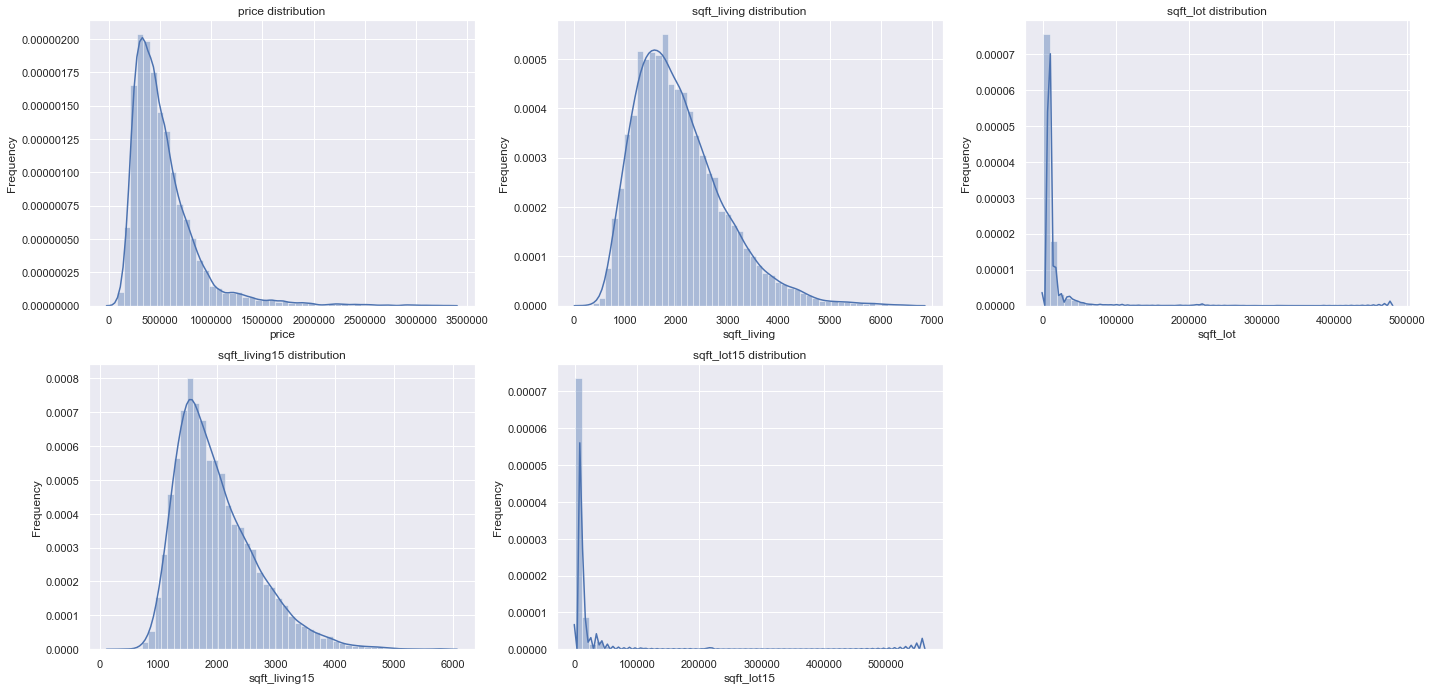

In [91]:
#plotting the columns with continuous values
plt.figure(figsize = (20,14))
i = 331
for col in ['price','sqft_living','sqft_lot','sqft_living15','sqft_lot15']:
    plt.subplot(i)
    plt.tight_layout()
    sns.distplot(df_log[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'{col} distribution')
    i+=1

Our features became more normally distributed.

#### Correlation ####

We would like to identify which variables may be associated with one another, we have 2 graphical ways to identify them: via a Correlation matrix and a Graph (Scatterplot or a Heatmap). 

The correlation matrix contains the numeric values that show the extent that one variable is associated to another (in ranges from -1 to 1). The higher the absolute value the stronger the correlation.

We'll display both: Matrix and Graph

In [92]:
#finding the correlation matrix amongst variables. 
corr = abs(df_log.corr())
corr

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.020643,0.002705,0.007270,0.011182,0.148788,0.018709,0.006105,0.011398,0.023480,0.009480,0.009444,0.004396,0.022609,0.010974,0.008851,0.002525,0.022168,0.002896,0.140904
price,0.020643,1.000000,0.316905,0.511860,0.685167,0.090326,0.265260,0.219323,0.388130,0.044482,0.674868,0.587396,0.297200,0.050540,0.113526,0.048476,0.331561,0.022267,0.597321,0.073349
bedrooms,0.002705,0.316905,1.000000,0.521581,0.598199,0.040033,0.178992,0.010588,0.074309,0.025313,0.363144,0.491154,0.295259,0.166136,0.013058,0.160680,0.015388,0.139851,0.403934,0.030797
bathrooms,0.007270,0.511860,0.521581,1.000000,0.746485,0.086088,0.506643,0.044447,0.170595,0.126504,0.658161,0.674209,0.258672,0.516592,0.041171,0.206786,0.020664,0.228078,0.565575,0.075779
sqft_living,0.011182,0.685167,0.598199,0.746485,1.000000,0.190580,0.355922,0.074322,0.263649,0.058140,0.758157,0.869608,0.408211,0.326644,0.044217,0.203203,0.048859,0.247940,0.761029,0.175041
sqft_lot,0.148788,0.090326,0.040033,0.086088,0.190580,1.000000,0.015848,0.020210,0.073003,0.013679,0.124274,0.200805,0.013598,0.063495,0.011874,0.148691,0.093723,0.261511,0.178106,0.781326
floors,0.018709,0.265260,0.178992,0.506643,0.355922,0.015848,1.000000,0.018279,0.024099,0.264370,0.458832,0.529609,0.254596,0.491220,0.002485,0.059456,0.047982,0.126217,0.277702,0.019141
waterfront,0.006105,0.219323,0.010588,0.044447,0.074322,0.020210,0.018279,1.000000,0.369551,0.016784,0.064892,0.049159,0.059229,0.028250,0.070473,0.034190,0.015694,0.038764,0.068712,0.033044
view,0.011398,0.388130,0.074309,0.170595,0.263649,0.073003,0.024099,0.369551,1.000000,0.047116,0.236083,0.146505,0.258053,0.059128,0.089785,0.089523,0.005460,0.081965,0.268776,0.066096
condition,0.023480,0.044482,0.025313,0.126504,0.058140,0.013679,0.264370,0.016784,0.047116,1.000000,0.146964,0.160496,0.173292,0.361843,0.055545,0.002772,0.013931,0.105964,0.092869,0.003789


Text(0.5, 1.0, 'Correlation Graph')

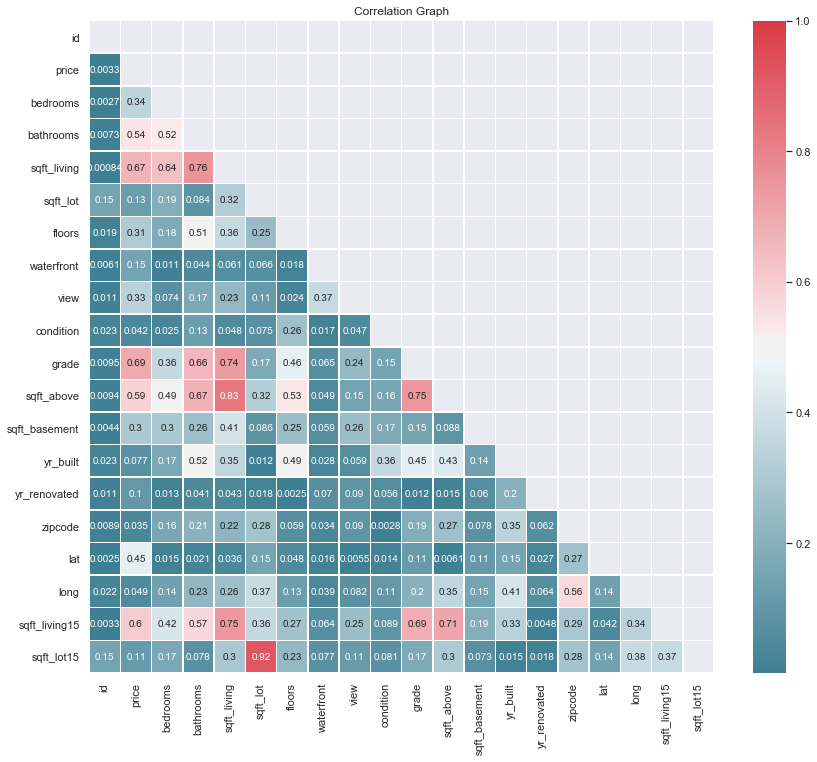

In [33]:
plt.figure(figsize=(14,12)) #setting size of graph
cmap = sns.diverging_palette(220, 10, as_cmap=True) #colormap

#creating a mask to display only half of the heatmap
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#centered color to change around my threshold for correlation 0.5
sns.heatmap(corr, annot = True, mask=mask, cmap=cmap ,linewidths=.5, center=0.5); 
plt.title('Correlation Graph')

As we note, the graph provides a much easier visualization fo the higher correlation amongst features, with lighter-red colors indicating stronger correlation (and also confirmed with the number from the corr results).

Our main interest is how the price may be affected by other factors so, using the graph and matrix, we select sqft_living, grade and sqft_living 15 for further analysis.

We also note a high correlation between sqft_above and sqft_living (0.71) and also between sqft_above and grade (.75)
indicating multicollinearilty.

Multicollinearity is a problem because it undermines the statistical significance of an independent variable. I decide to eliminate sqft_above to remove the multicollinearity with the other variables.

In [93]:
#removing sqft_above from the dataset and saving in a different dataframe
df_cln = df_log
df_cln.drop('sqft_above',axis=1, inplace = True)


**d) Identify categorical data:** several columns seem to have few values and could be converted as categories. ie: bedrooms, bathrooms, condition, floors, grade, view, waterfront, zipcode. Others such as yr_built and yr_renovated could be binned to create ranges of years (instead of dealing with individual years) 

Displaying our columns looking for values.

In [94]:
for col in ['bedrooms', 'bathrooms', 'condition', 'floors', 'grade', 'view', 'waterfront', 'zipcode']:
        print(f'{col}\nunique:{df_cln[col].unique()}\nvalue counts\n{df_cln[col].value_counts().head(10)}\n')

bedrooms
unique:[3 2 4 5 1 6 7 8]
value counts
3    9815
4    6859
2    2754
5    1572
6     263
1     195
7      34
8      11
Name: bedrooms, dtype: int64

bathrooms
unique:[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 0.5  5.25 5.5 ]
value counts
2.50    5374
1.00    3848
1.75    3043
2.25    2046
2.00    1927
1.50    1445
2.75    1183
3.00     747
3.50     726
3.25     582
Name: bathrooms, dtype: int64

condition
unique:[3 5 4 1 2]
value counts
3    13954
4     5656
5     1695
2      169
1       29
Name: condition, dtype: int64

floors
unique:[1.  2.  1.5 3.  2.5 3.5]
value counts
1.0    10656
2.0     8172
1.5     1906
3.0      608
2.5      155
3.5        6
Name: floors, dtype: int64

grade
unique:[ 7  6  8 11  9  5 10 12  4  3 13]
value counts
7     8961
8     6058
9     2609
6     2037
10    1125
11     378
5      240
12      64
4       27
13       3
Name: grade, dtype: int64

view
unique:[0. 3. 4. 2. 1.]
value counts
0.0    19434
2.0 

In [95]:
#converting our columns to categories
for col in ['bedrooms', 'bathrooms', 'condition', 'floors', 'grade', 'view', 'waterfront', 'zipcode']:
    df_cln[col] = df_cln[col].astype('category')
df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 21596
Data columns (total 20 columns):
id               21503 non-null int64
date             21503 non-null datetime64[ns]
price            21503 non-null float64
bedrooms         21503 non-null category
bathrooms        21503 non-null category
sqft_living      21503 non-null int64
sqft_lot         21503 non-null int64
floors           21503 non-null category
waterfront       21503 non-null category
view             21503 non-null category
condition        21503 non-null category
grade            21503 non-null category
sqft_basement    21503 non-null float64
yr_built         21503 non-null int64
yr_renovated     21503 non-null float64
zipcode          21503 non-null category
lat              21503 non-null float64
long             21503 non-null float64
sqft_living15    21503 non-null int64
sqft_lot15       21503 non-null int64
dtypes: category(8), datetime64[ns](1), float64(5), int64(6)
memory usage: 2.3 MB


Now dealing with yr_built and yr_renovated. 

In [96]:
for col in ['yr_built', 'yr_renovated']:
        print(f'{col}\nunique:{df_cln[col].unique()}\nvalue counts\n{df_cln[col].value_counts().head()}\n')

yr_built
unique:[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
value counts
2014    558
2006    450
2005    447
2004    429
2003    418
Name: yr_built, dtype: int64

yr_renovated
unique:[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 196

For yr_built, knowing the decade when it was built would be enough binning

In [97]:
# creating bins for the decades when house was built
labels =[1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
df_cln['bin_yr_built'] = pd.cut(df_cln.yr_built, 
                            bins = [1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2015], 
                            labels = labels)
print (df_cln.bin_yr_built.value_counts())

2000    3402
1960    2539
1950    2445
1970    2386
1980    2354
1990    2119
1940    1851
1920    1182
2010    1097
1910     762
1900     689
1930     590
1890      87
Name: bin_yr_built, dtype: int64


For yr_renovated we care how recent the renovation (if any) was. Not renovated houses and renovations that are too old (more than 15-20 years) may not be apealing to the taste of consumers and also materials safety used may be a concern instead of an advantage which may not be an issue for more recent renovations; so I want to create bins for: not renovated houses (0), renovations prior to 1990 (1), renovations between 1990 and 2000 (2), renovations between 2000 and 2010 (3) and renovations after 2010 (4).

In [98]:
#creating bins for the yr_renovated columns in a new column
labels =[0,1,2,3,4]
df_cln['bin_yr_renovated'] = pd.cut(df_cln.yr_renovated, bins = [1890,1900,1990,2000,2010,2016], labels = labels) 
df_cln.bin_yr_renovated.value_counts()

1    242
3    209
2    148
4    135
0      0
Name: bin_yr_renovated, dtype: int64

After the category 0 (No renovations) is created, we now assign all NULL the Zero value

In [99]:
#We replace the NULL values for Zero
df_cln.bin_yr_renovated.fillna(0, inplace = True)
df_cln.loc[df_cln.bin_yr_renovated.isna()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bin_yr_built,bin_yr_renovated


In [100]:
# and confirm our column bin_yr_renovated value counts
df_cln.bin_yr_renovated.value_counts()

0    20769
1      242
3      209
2      148
4      135
Name: bin_yr_renovated, dtype: int64


We'll continue refining our data in case necessary in the next phases.

**Interesting questions**

Since my main interest is explain which other variables could have an effect in the proces I select the variables that we see a correlation with (from the correlation graph) and also based on our defined categories to see how their relationship looks like. 

Questions I'd like to address:

* Does the size affect the price?
* Is the price affected by the year the house was built?
* Is the price affected by renovations?  if so, does a more recent renovation affect the price more than older renovations?
* Does the zipcode affect the price?

#### Does the size affect the price?####

Using scatterplots helps us visualize the relationship between sqft_living and price.

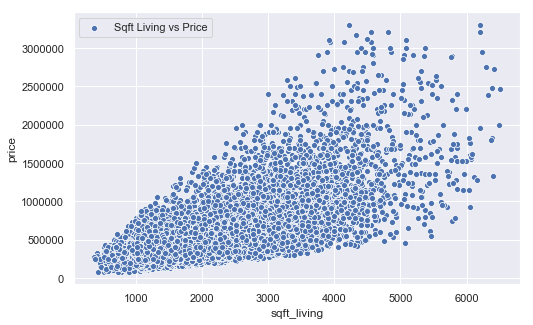

In [101]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='sqft_living', y='price', data = df_cln, label = 'Sqft Living vs Price')

We knew from the corr table that there's a relationship between these 2 variables, scatterplot helps un visualize there's positive linearity and this feature is a great candidate to build our statistical model.

#### Is the price affected by the year the house was built?####

I would like to see the relationship between st yr_built and price. To achieve this, my first step is group the data by yr_built and then plot vs  the price.

In [102]:
#grouped contains only yr_built and price columns grouped by yr_built
grouped = df_cln.groupby(['yr_built'])['yr_built','price'].aggregate(np.mean)

Price mean = 543479.9614020485


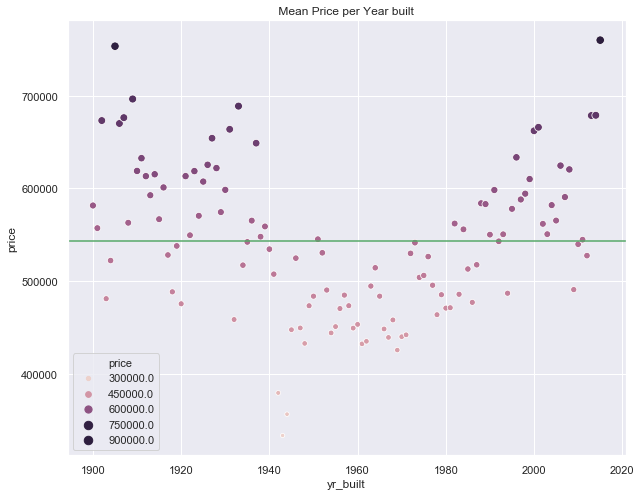

In [103]:
plt.figure(figsize = (10,8))
sns.scatterplot(x=grouped.index, y='price', data = grouped, hue='price', size = 'price')

plt.axhline(y=grouped.price.mean(), color='g', linestyle='-',label='Mean price')
plt.title(' Mean Price per Year built ')
print(f'Price mean = {grouped.price.mean()}')

Interesting to note that houses built around the period 1940 and 1980 are mostly below the mean. Although the year a home is built can't be controlled by sellers nor buyers, it may provide insight of comparable homes not only by other factors as size and location but of potential concerns that force the sale price to a lower value - giving less room for negotiation.

#### Is the price affected by renovations?  if so, does a more recent renovation affect the price more than older renovations? ####

Knowing the mean price for homes non renovated versus renovated would help us answer this question.

In [104]:
#grouped contains only bin_yr_renovated and price columns grouped by bin_yr_renovated
grouped_reno = df_cln.groupby(['bin_yr_renovated'])['bin_yr_renovated','price'].aggregate(np.mean)

In [105]:
# the mean price for our dataset
print(f'Price mean = {grouped_reno.price.mean()}')

Price mean = 693613.4695152662


In [106]:
grouped_reno

,price
bin_yr_renovated,
0,525593.586162
1,620098.462810
2,803224.148649
3,858602.712919
4,660548.437037


Text(0.5, 1.0, ' Mean Price per Renovation bin')

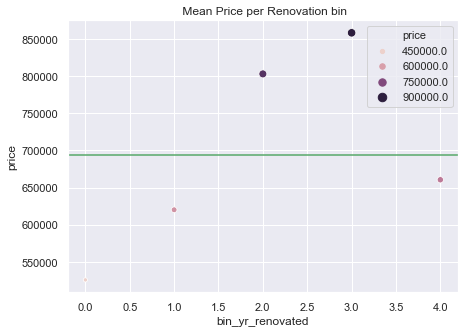

In [107]:
plt.figure(figsize = (7,5))
sns.scatterplot(x=grouped_reno.index, y='price', data = grouped_reno, hue='price', size = 'price')

plt.axhline(y=grouped_reno.price.mean(), color='g', linestyle='-',label='Mean price')
plt.title(' Mean Price per Renovation bin')

From our graph and our means we note that there is a difference in our means for houses not renovated (Category 0) and the rest. Being our category 3 (renovations between 2000 and 2010) the one that has more impact on the mean price of homes.

#### Does the zipcode affect the price?###

Check the relationship between zipcode and price, first by grouping the data by zipcode and then plot vs the price.

In [108]:
#grouped contains only zipcode and price columns grouped by zipcode
grouped_zip = df_cln.groupby(['zipcode'])['zipcode','price'].aggregate(np.mean)

Text(0.5, 1.0, ' Mean Price per Zipcode')

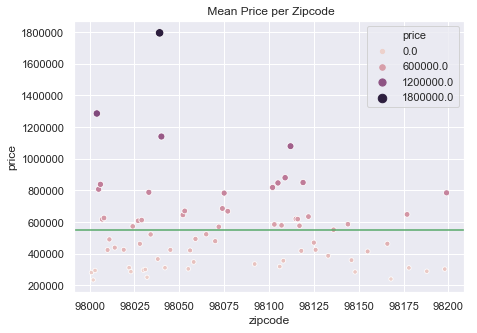

In [157]:
plt.figure(figsize = (7,5))
sns.scatterplot(x=grouped_zip.index, y='price', data = grouped_zip, hue='price', size = 'price')

plt.axhline(y=grouped_zip.price.mean(), color='g', linestyle='-',label='Mean price')
plt.title(' Mean Price per Zipcode')

Some zipcodes seem to have higher prices than others. Identify those zipcodes that have a mean that is higher than the entire dataset's mean.

In [109]:
#define 2 datasets one with zipcodes with higher than mean price and one with zipcodes lower than mean price
grouped_zip_upper = grouped_zip.loc[grouped_zip.price>grouped_zip.price.mean()]
grouped_zip_lower = grouped_zip.loc[grouped_zip.price<=grouped_zip.price.mean()]
#df.drop(to_drop, inplace = True)
print(f'Mean for upper groupped zipcodes = {grouped_zip_upper.price.mean()}')
print(f'Mean for lower groupped zipcodes = {grouped_zip_lower.price.mean()}')

Mean for upper groupped zipcodes = 761669.322981608
Mean for lower groupped zipcodes = 370076.4405139413


In [110]:
# define function that adds a column with the category for zipcode (from whitcraft example)
def assign_zipcode_type(zipcode):
    if zipcode in grouped_zip_upper.index:
        return '1_up'
    elif zipcode in grouped_zip_lower.index:
        return '2_low'
    else:
        return 'check'

In [111]:
df_cln['zipcode_type'] = df_cln.zipcode.apply(assign_zipcode_type)

In [112]:
df_cln.zipcode_type.value_counts()

2_low    11639
1_up      9864
Name: zipcode_type, dtype: int64

Now, we graph the distribution of sqft_living vs price with the colo-coding of zipcode_type

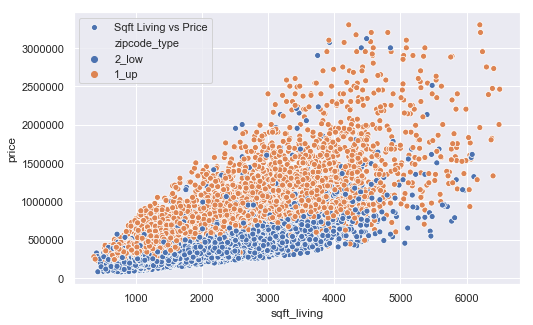

In [113]:
plt.figure(figsize = (8,5))
sns.scatterplot(x='sqft_living', y='price', data = df_cln, hue = 'zipcode_type', label = 'Sqft Living vs Price')

This ilustrates that the type of zipcode (upper or lower than average price) would have a different price for a similar sqft_living.

Now, we convert this new feature into a category

In [114]:
#save as category
df_cln['zipcode_type']= df_cln.zipcode_type.astype('category')

save or working dataset that will be used for modeling only with the columns of interest

In [115]:
df_test = df_cln[['price','sqft_living','bin_yr_built','bin_yr_renovated','zipcode_type','grade']].copy()

In [116]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 21596
Data columns (total 6 columns):
price               21503 non-null float64
sqft_living         21503 non-null int64
bin_yr_built        21503 non-null category
bin_yr_renovated    21503 non-null category
zipcode_type        21503 non-null category
grade               21503 non-null category
dtypes: category(4), float64(1), int64(1)
memory usage: 589.4 KB


In [117]:
# make dummies for categorical values
for col in df_test.select_dtypes('category').columns:
    col = pd.get_dummies(df_test[col],prefix=col)
    df_test = df_test.join(col)    

In [118]:
#and then we drop the original categorical values
for col in df_test.select_dtypes('category').columns:
    df_test.drop(col, axis=1, inplace=True)   

In [119]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 21596
Data columns (total 33 columns):
price                 21503 non-null float64
sqft_living           21503 non-null int64
bin_yr_built_1890     21503 non-null uint8
bin_yr_built_1900     21503 non-null uint8
bin_yr_built_1910     21503 non-null uint8
bin_yr_built_1920     21503 non-null uint8
bin_yr_built_1930     21503 non-null uint8
bin_yr_built_1940     21503 non-null uint8
bin_yr_built_1950     21503 non-null uint8
bin_yr_built_1960     21503 non-null uint8
bin_yr_built_1970     21503 non-null uint8
bin_yr_built_1980     21503 non-null uint8
bin_yr_built_1990     21503 non-null uint8
bin_yr_built_2000     21503 non-null uint8
bin_yr_built_2010     21503 non-null uint8
bin_yr_renovated_0    21503 non-null uint8
bin_yr_renovated_1    21503 non-null uint8
bin_yr_renovated_2    21503 non-null uint8
bin_yr_renovated_3    21503 non-null uint8
bin_yr_renovated_4    21503 non-null uint8
zipcode_type_1_up     21503 n

We're ready to begin the modeling.

### 4. Model

Our selected model: which tools will I use to present the data
What can we use from the provided data? What type of predictions can we do based on what we've been given?



In [120]:
#make a copy of the final datafram to model
df_model = df_test.copy()

In [121]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


X = df_model.drop(['price'], axis =1)
y = df_model['price']

In [122]:
#use Linear Regression with sklearn

linreg = LinearRegression()

In [123]:
linreg.fit(X,y)
LinearRegression(copy_X = True, fit_intercept = True, n_jobs =1 , normalize = False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
linreg.score(X,y)

0.7069844434807038

Not a bad value for our regression but we want to target to be closer to 0.9 indicating a strong correlation between our features and the price.

I will separate next the data in train and test subsets. The training set contains a known output and the model learns on this data to generalize other data later*. The test_size = 0.2 inside the train_test_split function indicates the percentage of the data that should be held over for testing. It is generally 80/20 or 70/30.

train_test_split splits arrays or matrices into random train and test subsets. That means that everytime you run it without specifying random_state, you will get a different result, this is expected behavior

On the other hand if you use random_state=some_number, then you can guarantee that the output of Run 1 will be equal to the output of Run 2, i.e. your split will be always the same. It doesn't matter what the actual random_state number is 42, 0, 21. The important thing is that everytime you use 42, you will always get the same output the first time you make the split. This is useful if you want reproducible results, for example in the documentation, so that everybody can consistently see the same numbers when they run the examples. In practice I would say, you should set the random_state to some fixed number while you test stuff, but then remove it in production if you really need a random (and not a fixed) split.


from : Train/Test Split and Cross Validation in Python - Adi Bronshtein

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

X = df_model.drop(['price'], axis =1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#fit our training feature to our target variable - price
linreg.fit(X_train, y_train)

#predicted prices from our training subset are stored in y_pred_train
y_pred_train = linreg.predict(X_train)

#predicted prices from our testing subset are stored in y_pred_test
y_pred_test = linreg.predict(X_test)

#predicted prices using the complete dataset
y_pred_all = linreg.predict(X)

#calculate residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

# calculate mean squer error for train and test results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error train:',round(mse_train,2))
print('Mean Squared Error test:',round(mse_test,2))

#calculate R-squared
r_square = r2_score(y,y_pred_all)
adj_r_square = 1 - ((1-r_square)*(len(y)-1))/(len(y)-X.shape[1]-1)

r2 = round(linreg.score(X,y),3)
print('R squared:', r2)

print(r_square, adj_r_square)

Mean Squared Error train: 31319147114.64
Mean Squared Error test: 36031950551.2
R squared: 0.707
0.7066792344414373 0.7062420539804278


In [130]:
#calculate the mean absolute error
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:',round(mean_abs_error,2))

#calculate the root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:',round(rmse,2))

Mean Absolute Error: 117820.43
Root Mean Squared Error: 189820.84


In [126]:
#calculate mean predicted price and mean actual price
average_predicted_price = y_pred_test.mean()
average_actual_price = y_test.mean()
print('Average Predicted Price:',round(average_predicted_price,2))
print('Average Actual Price:',round(average_actual_price,2))

Average Predicted Price: 534622.64
Average Actual Price: 537423.52


An accuracy (R-squared measuring how close the data is to the fitted regression line) of 0.707 is not bad but not great either. This means that aprox 70.4 % of the variability can be explained by our model, and the Root Mean Squared Error tells us how far (in average) from our regression line some of the predicted values are : the mode is 189,820 dollars off.  

We will look to optimize our model, by rescaling our features before modeling

In [134]:
df_model2 = df_cln.copy()

In [135]:
df_model2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21503 entries, 0 to 21596
Data columns (total 23 columns):
id                  21503 non-null int64
date                21503 non-null datetime64[ns]
price               21503 non-null float64
bedrooms            21503 non-null category
bathrooms           21503 non-null category
sqft_living         21503 non-null int64
sqft_lot            21503 non-null int64
floors              21503 non-null category
waterfront          21503 non-null category
view                21503 non-null category
condition           21503 non-null category
grade               21503 non-null category
sqft_basement       21503 non-null float64
yr_built            21503 non-null int64
yr_renovated        21503 non-null float64
zipcode             21503 non-null category
lat                 21503 non-null float64
long                21503 non-null float64
sqft_living15       21503 non-null int64
sqft_lot15          21503 non-null int64
bin_yr_built        21503 no

In [137]:
#standardize non categorical features
for col in ['price','sqft_living', 'sqft_lot','sqft_basement','yr_built',
            'yr_renovated','lat','long','sqft_living15','sqft_lot15']:
    df_model2[col] = (df_model2[col]-df_model2[col].mean())/df_model2[col].std()

In [139]:
for col in ['price','sqft_living', 'sqft_lot','sqft_basement','yr_built',
            'yr_renovated','lat','long','sqft_living15','sqft_lot15']:
    for val in df_model2[col]:
        if val >=3 :
            df_model2[col] = df_model2[col].replace(val,np.nan)

In [140]:
df2_cln = df_model2.dropna()
df2_cln.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
bin_yr_built        0
bin_yr_renovated    0
zipcode_type        0
dtype: int64

In [142]:
# make dummies for categorical values
for col in df2_cln.select_dtypes('category').columns:
    col = pd.get_dummies(df2_cln[col],prefix=col)
    df2_cln = df2_cln.join(col)    

In [143]:
#and then we drop the original categorical values
for col in df2_cln.select_dtypes('category').columns:
    df2_cln.drop(col, axis=1, inplace=True)   

In [145]:
df2_cln.drop('date', axis=1, inplace=True)

In [146]:
df2_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19343 entries, 0 to 21596
Columns: 159 entries, id to zipcode_type_2_low
dtypes: float64(10), int64(1), uint8(148)
memory usage: 5.1 MB


In [147]:
#run model again
X = df2_cln.drop(['price'], axis =1)
y = df2_cln['price']
linreg = LinearRegression()
linreg.fit(X,y)
LinearRegression(copy_X = True, fit_intercept = True, n_jobs =1 , normalize = False)

linreg.score(X,y)

0.8426779979068268

This time our accuracy improved to 0.84

In [148]:
df_model = df2_cln.copy()

In [149]:
X = df_model.drop(['price'], axis =1)
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#fit our training feature to our target variable - price
linreg.fit(X_train, y_train)

#predicted prices from our training subset are stored in y_pred_train
y_pred_train = linreg.predict(X_train)

#predicted prices from our testing subset are stored in y_pred_test
y_pred_test = linreg.predict(X_test)

#predicted prices using the complete dataset
y_pred_all = linreg.predict(X)

#calculate residuals
train_residuals = y_pred_train - y_train
test_residuals = y_pred_test - y_test

# calculate mean squer error for train and test results
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error train:',round(mse_train,2))
print('Mean Squared Error test:',round(mse_test,2))

#calculate R-squared
r_square = r2_score(y,y_pred_all)
adj_r_square = 1 - ((1-r_square)*(len(y)-1))/(len(y)-X.shape[1]-1)

r2 = round(linreg.score(X,y),3)
print('R squared:', r2)

print(r_square, adj_r_square)

Mean Squared Error train: 0.08
Mean Squared Error test: 0.09
R squared: 0.842
0.8423017963529802 0.8410029892128514


In [154]:
#calculate the mean absolute error
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:',mean_abs_error)

#calculate the root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error test:',rmse,2)

#calculate mean predicted price and mean actual price
average_predicted_price = y_pred_test.mean()
average_actual_price = y_test.mean()
print('Average Predicted Price:',average_predicted_price)
print('Average Actual Price:',average_actual_price)

Mean Absolute Error: 0.20298173879218995
Root Mean Squared Error test: 0.296659372418892 2
Average Predicted Price: -0.130815562829488
Average Actual Price: -0.12920026713808225


The average predicted and average actual prices are similar.

We use cross-validation to test the model's ability to predict new data

In [156]:
cross_val = [cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")]
cross_val

[array([-0.07999191, -0.08067309, -0.08301835, -0.07703341, -0.0880601 ])]

## Summary

The available predictive model can explain 84.2% of the variability of the data (R squared of 0.842). 
